### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Importing Data

In [2]:
data_raw = pd.read_csv('train.csv')
data_val  = pd.read_csv('test.csv')
data_cleaner = [data_raw, data_val]

data_val_passenger_id = data_val.PassengerId

print (data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [3]:
print('Train columns with null values:\n', data_raw.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### COMPLETING: complete or delete missing values in train and test/validation dataset

In [4]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #delete the cabin feature/column and others previously stated to exclude in train dataset
    drop_column = ['PassengerId','Cabin', 'Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

print(data_raw.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### CREATE: Feature Engineering for train and test/validation dataset

In [5]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics
    title_names = (dataset['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

    print(dataset['Title'].value_counts())
    print("-"*10)

#preview data again
print(data_raw.info())
print(data_val.info())
data_raw.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: c

E:\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
205,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,10.4625,S,2,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
714,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(48.0, 64.0]"
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C,2,0,Mr,"(31.0, 512.329]","(64.0, 80.0]"
808,0,2,"Meyer, Mr. August",male,39.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
479,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,12.2875,S,2,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S,1,1,Mr,"(-0.001, 7.91]","(64.0, 80.0]"
857,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"
539,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,49.5000,C,3,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,78.2667,C,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,41.5792,C,4,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"


### Encoding Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Fare_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['Age_Code'] = label.fit_transform(dataset['AgeBin'])

In [7]:
data_raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Fare_Code,Age_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,1,2


In [8]:
data_raw_dummy_columns = pd.get_dummies(data_raw[["Title", "Embarked"]])
data_raw = pd.concat([data_raw, data_raw_dummy_columns], axis=1)

data_val_dummy_columns = pd.get_dummies(data_val[["Title", "Embarked"]])
data_val = pd.concat([data_val, data_val_dummy_columns], axis=1)

In [9]:
data_raw.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin',
       'AgeBin', 'Sex_Code', 'Fare_Code', 'Age_Code', 'Title_Master',
       'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [10]:
data_raw.drop(columns=["Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "FareBin", "AgeBin"], inplace=True)
data_val.drop(columns=["Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "FareBin", "AgeBin"], inplace=True)

In [11]:
data_raw.head()

,Survived,Pclass,FamilySize,IsAlone,Sex_Code,Fare_Code,Age_Code,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,0,1,0,1,0,0,0,1,0,0,0,1
1,1,1,2,0,0,3,2,0,0,0,0,1,1,0,0
2,1,3,1,1,0,1,1,0,0,1,0,0,0,0,1
3,1,1,2,0,0,3,2,0,0,0,0,1,0,0,1
4,0,3,1,1,1,1,2,0,0,0,1,0,0,0,1


In [12]:
data_val.head()

,Pclass,FamilySize,IsAlone,Sex_Code,Fare_Code,Age_Code,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,3,1,1,1,0,2,0,0,0,1,0,0,1,0
1,3,2,0,0,0,3,0,0,0,0,1,0,0,1
2,2,1,1,1,1,4,0,0,0,1,0,0,1,0
3,3,1,1,1,1,1,0,0,0,1,0,0,0,1
4,3,3,0,0,1,1,0,0,0,0,1,0,0,1


### Splitting data_raw into training and testing data

In [13]:
X = data_raw.drop(columns=["Survived"])
y = data_raw.Survived

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Machine Learning Algorithm (MLA) Selection and Initialization

In [15]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  classifier_accuracy_score = accuracy_score(y_test, y_pred)

  kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

  MLA_name = classifier.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
  MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

  row_index+=1

E:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in X

[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in X

[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in X

[21:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Learning rate set to 0.008911
0:	learn: 0.6867998	total: 207ms	remaining: 3m 27s
1:	learn: 0.6803879	total: 209ms	remaining: 1m 44s
2:	learn: 0.6740398	total: 210ms	remaining: 1m 9s
3:	learn: 0.6684132	total: 211ms	remaining: 52.6s
4:	learn: 0.6630976	total: 212ms	remaining: 42.2s
5:	learn: 0.6582018	total: 214ms	remaining: 35.4s
6:	learn: 0.6523846	total: 215ms	remaining: 30.5s
7:	learn: 0.6471014	total: 216ms	remaining: 26.8s
8:	learn: 0.6416255	total: 217ms	remaining: 23.9s
9:	learn: 0.6369697	total: 218ms	remaining: 21.6s
10:	learn: 0.6313350	total: 219ms	remaining: 19.7s
11:	learn: 0.6286133	total: 219ms	remaining: 18.1s
12:	learn: 0.6240212	total: 220ms	remaining: 16.7s
13:	learn: 0.6198413	total: 221ms	remaining: 15.6s
14:	learn: 0.6146251	total: 222ms	remaining: 14.6s
15:	learn: 0.6096649	total: 223ms	remaining: 13.7s
16:	learn: 0.6049481	total: 224ms	remaining: 12.9s
17:	learn: 0.5999792	total: 225ms	remaining: 12.3s
18:	learn: 0.5952894	total: 226ms	remaining: 11.7s
19:	learn

In [16]:
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,AdaBoostClassifier,79.329609,81.758607
1,BaggingClassifier,77.094972,82.451095
2,ExtraTreesClassifier,77.094972,82.312207
3,GradientBoostingClassifier,77.653631,83.155321
4,RandomForestClassifier,79.329609,82.453052
5,GaussianProcessClassifier,77.653631,82.456964
6,LogisticRegressionCV,80.446927,83.018388
7,PassiveAggressiveClassifier,74.860335,73.765649
8,RidgeClassifierCV,80.446927,83.437011
9,SGDClassifier,73.743017,80.483177


In [17]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x = MLA_compare["MLA Name"],
    y = MLA_compare["Accuracy Score"],
))
fig.update_layout(
  title="Comparing Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="Accuracy Score"
)

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = MLA_compare["MLA Name"],
    y = MLA_compare["K-Fold Accuracy"],
))
fig.update_layout(
  title="Comparing K-Fold Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="K_Fold Accuracy Score"
)

In [19]:
MLA_compare = MLA_compare.sort_values(by='K-Fold Accuracy', ascending=False)
MLA_compare.reset_index(drop=True, inplace=True)

In [20]:
MLA_compare[MLA_compare["K-Fold Accuracy"] >= 83]

,MLA Name,Accuracy Score,K-Fold Accuracy
0,SVC,79.888268,83.724570
1,LinearSVC,79.888268,83.722613
2,NuSVC,79.888268,83.444836
3,RidgeClassifierCV,80.446927,83.437011
4,LinearDiscriminantAnalysis,79.888268,83.437011
5,GradientBoostingClassifier,77.653631,83.155321
6,LogisticRegressionCV,80.446927,83.018388
7,CatBoostClassifier,78.770950,83.016432


### Hyperparameter Tuning for SVC Model

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

data_val_scaled = sc.transform(data_val)

In [22]:
from sklearn.model_selection import GridSearchCV

classifier = svm.SVC(random_state=0)

parameters = [{'C': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'kernel': ['linear']},
              {'C': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train_scaled, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84.14 %
Best Parameters: {'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}


### Training and Predictiong SVC Model with Tuned Parameter

K-Fold Accuracy : 84.14 %
Test Accuracy :  0.776536312849162 

Confusion Matrix 
 [[97  9]
 [31 42]]


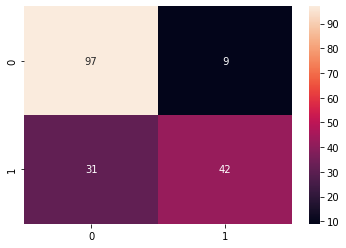

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

classifier = svm.SVC(
    random_state = 0,
    C= 0.5,
    gamma= 0.2,
    kernel= 'rbf'
)
classifier.fit(X_train_scaled, y_train)

accuracies = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10)
print(f"K-Fold Accuracy : {accuracies.mean()*100:.2f} %")

y_pred = classifier.predict(X_test_scaled)
print("Test Accuracy : ", accuracy_score(y_test, y_pred), "\n")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", cm)

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='2.0f')
plt.show()

In [27]:
y_data_val = classifier.predict(data_val_scaled)
y_data_val

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Saving Predictions to CSV file

In [28]:
output = pd.DataFrame({'PassengerId': data_val_passenger_id, 'Survived': y_data_val})
output.to_csv('submission-SVC.csv', index=False)